In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv('Tweets.csv')
test = pd.read_csv('Tweets.csv')

In [3]:
train.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,1160091065472487424,2019-08-10 13:00:38,NaN,False,False,NaN,1.0,0.0,0.0,# KashmirWithModi \nWith the scrapping of Art...,/Hilladventure1/status/1160091065472487424,1.154411e+18,Hilladventure1
1,1160065502200205312,2019-08-10 11:19:03,NaN,False,False,NaN,0.0,0.0,0.0,Shocking & Shameful! A must read article for...,/samwhitefyr/status/1160065502200205312,9.913207e+17,samwhitefyr
2,1161366914007875584,2019-08-14 01:30:24,NaN,True,False,NaN,0.0,0.0,0.0,"What makes "" True Islam followers"" like you co...",/rashidakhan1977/status/1161366914007875584,7.105491e+17,rashidakhan1977
3,1162074264301785088,2019-08-16 00:21:09,NaN,True,False,NaN,0.0,0.0,0.0,Just sickening to read this thread. I guess it...,/indianbyheart76/status/1162074264301785088,5.796150e+08,indianbyheart76
4,1160566972569939969,2019-08-11 20:31:43,NaN,True,False,NaN,0.0,0.0,0.0,"Don't worry Pyari Behna, whoever opposing or p...",/ShivaprakashYe2/status/1160566972569939969,1.134819e+18,ShivaprakashYe2


In [4]:
test.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,1160091065472487424,2019-08-10 13:00:38,NaN,False,False,NaN,1.0,0.0,0.0,# KashmirWithModi \nWith the scrapping of Art...,/Hilladventure1/status/1160091065472487424,1.154411e+18,Hilladventure1
1,1160065502200205312,2019-08-10 11:19:03,NaN,False,False,NaN,0.0,0.0,0.0,Shocking & Shameful! A must read article for...,/samwhitefyr/status/1160065502200205312,9.913207e+17,samwhitefyr
2,1161366914007875584,2019-08-14 01:30:24,NaN,True,False,NaN,0.0,0.0,0.0,"What makes "" True Islam followers"" like you co...",/rashidakhan1977/status/1161366914007875584,7.105491e+17,rashidakhan1977
3,1162074264301785088,2019-08-16 00:21:09,NaN,True,False,NaN,0.0,0.0,0.0,Just sickening to read this thread. I guess it...,/indianbyheart76/status/1162074264301785088,5.796150e+08,indianbyheart76
4,1160566972569939969,2019-08-11 20:31:43,NaN,True,False,NaN,0.0,0.0,0.0,"Don't worry Pyari Behna, whoever opposing or p...",/ShivaprakashYe2/status/1160566972569939969,1.134819e+18,ShivaprakashYe2


In [5]:
combi = train.append(test, ignore_index=True)

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [7]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*")

In [8]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [9]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [10]:
combi.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,tidy_tweet
0,1160091065472487424,2019-08-10 13:00:38,NaN,False,False,NaN,1.0,0.0,0.0,# KashmirWithModi \nWith the scrapping of Art...,/Hilladventure1/status/1160091065472487424,1.154411e+18,Hilladventure1,KashmirWithModi With scrapping Article dream S...
1,1160065502200205312,2019-08-10 11:19:03,NaN,False,False,NaN,0.0,0.0,0.0,Shocking & Shameful! A must read article for...,/samwhitefyr/status/1160065502200205312,9.913207e+17,samwhitefyr,Shocking Shameful must read article everyone s...
2,1161366914007875584,2019-08-14 01:30:24,NaN,True,False,NaN,0.0,0.0,0.0,"What makes "" True Islam followers"" like you co...",/rashidakhan1977/status/1161366914007875584,7.105491e+17,rashidakhan1977,What makes True Islam followers like conflate ...
3,1162074264301785088,2019-08-16 00:21:09,NaN,True,False,NaN,0.0,0.0,0.0,Just sickening to read this thread. I guess it...,/indianbyheart76/status/1162074264301785088,5.796150e+08,indianbyheart76,Just sickening read this thread guess doesn ma...
4,1160566972569939969,2019-08-11 20:31:43,NaN,True,False,NaN,0.0,0.0,0.0,"Don't worry Pyari Behna, whoever opposing or p...",/ShivaprakashYe2/status/1160566972569939969,1.134819e+18,ShivaprakashYe2,worry Pyari Behna whoever opposing protesting ...


In [11]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [KashmirWithModi, With, scrapping, Article, dr...
1    [Shocking, Shameful, must, read, article, ever...
2    [What, makes, True, Islam, followers, like, co...
3    [Just, sickening, read, this, thread, guess, d...
4    [worry, Pyari, Behna, whoever, opposing, prote...
Name: tidy_tweet, dtype: object

In [12]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [kashmirwithmodi, with, scrap, articl, dream, ...
1    [shock, shame, must, read, articl, everyon, sh...
2    [what, make, true, islam, follow, like, confla...
3    [just, sicken, read, thi, thread, guess, doesn...
4    [worri, pyari, behna, whoever, oppos, protest,...
Name: tidy_tweet, dtype: object

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ''.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

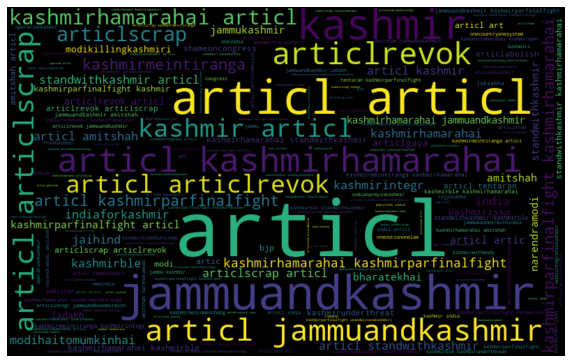

In [14]:
all_words = ''.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

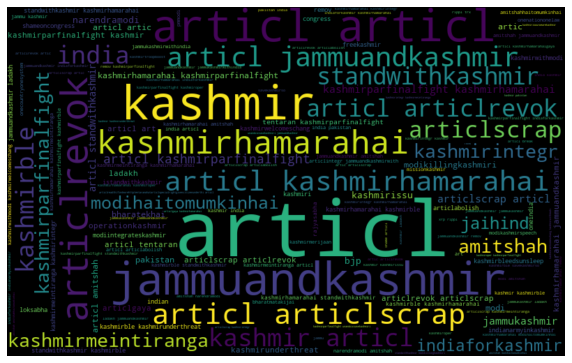

In [17]:
normal_words =''.join([text for text in combi['tidy_tweet'][combi['nbr_favorite'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

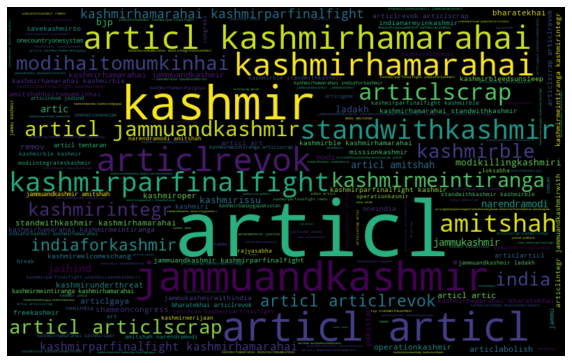

In [18]:
negative_words = ''.join([text for text in combi['tidy_tweet'][combi['nbr_favorite'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['nbr_favorite'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['nbr_favorite'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()